In [17]:
pip install open3d

ERROR: Could not find a version that satisfies the requirement open3d (from versions: none)
ERROR: No matching distribution found for open3d


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pyvista

In [19]:
import cv2
import numpy as np

image = cv2.imread('C:/Users/siva/Desktop/boy.jpg')

In [36]:
cv2.imshow('image',image)

In [20]:
if image is None:
    print("Error loading the image")

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detector = cv2.ORB_create()
keypoints, descriptors = detector.detectAndCompute(gray, None)

In [22]:
# Initialize the point cloud array
point_cloud = []

# Define a constant depth value
depth = 10.0

# Convert 2D image coordinates to 3D
for kp in keypoints:
    x, y = kp.pt
    point_cloud.append([x, y, depth])

# Convert the point cloud to a numpy array
point_cloud = np.array(point_cloud, dtype=np.float32)

In [23]:
# import open3d as o3d

# # Assuming you have a point cloud stored in 'point_cloud' variable

# # Create an Open3D point cloud object
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(point_cloud)

# # Visualize the point cloud
# o3d.visualization.draw_geometries([pcd])


In [24]:
import pyvista as pv
import numpy as np
from PIL import Image

In [25]:
image_array = np.array(image)

# Create a grid of points from the image pixels
x, y = np.meshgrid(np.arange(image_array.shape[1]), np.arange(image_array.shape[0]))
z = image_array[:, :, 0]  # Use the red channel as the z-coordinate
points = np.column_stack((x.flatten(), y.flatten(), z.flatten()))

# Create a PyVista point cloud
cloud = pv.PolyData(points)

C:\Users\siva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


C:\Users\siva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


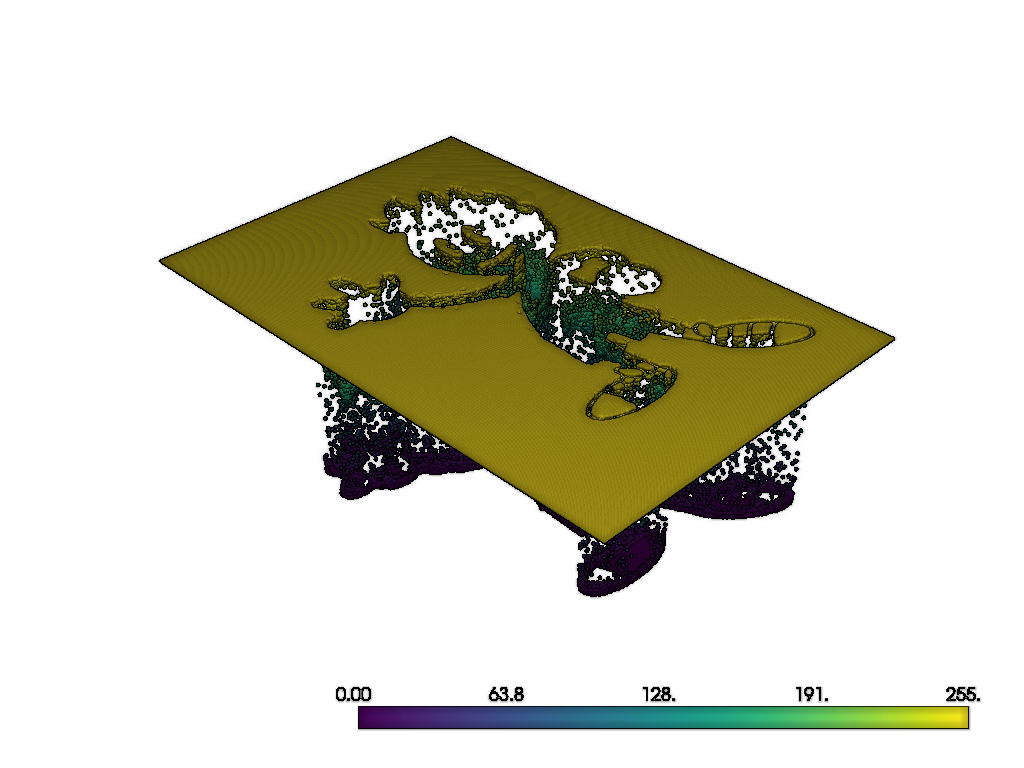

In [26]:
# Visualize the point cloud
plotter = pv.Plotter()
plotter.add_points(cloud, scalars=z.flatten(), render_points_as_spheres=True)
plotter.enable_eye_dome_lighting()
plotter.enable_terrain_style()
plotter.enable_trackball_style()
plotter.show()

In [27]:
# Save the point cloud in PLY format
cloud.save('C:/Users/siva/Desktop/point_cloud.ply')

In [28]:
# # Perform mesh generation using Poisson surface reconstruction
# mesh = cloud.delaunay_3d(alpha=0.1)

# # Visualize the mesh
# mesh.plot(show_edges=True)

In [29]:
pip install pymesh

In [30]:
import pymesh

In [31]:
# import numpy as np

# # Load point cloud data from a file
# point_cloud = np.loadtxt('path/to/point_cloud.xyz')

In [32]:
# Create a PyMesh mesh object from the point cloud
mesh = pymesh.form_mesh(cloud)

# Perform Poisson surface reconstruction
mesh, _ = pymesh.compute_outer_hull(mesh)


AttributeError: module 'pymesh' has no attribute 'form_mesh'